In [21]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [24]:
def expection(dist, params, xs):
    '''
    The expection step of EM algorithm.
    Input:
        dist: binary function, return the distance of two points
        params: a list of parameters of clusters.
        xs: features, ndarray of shape (n,)
    Return:
        labels of each data point in xs, ndarray in shape (n, )
    '''
    dist_mat = np.column_stack([dist(xs, param) for param in params])
    return np.argmin(dist_mat, axis=1)

def maximization(n_clusters, xs, ys):
    '''
    The maximization step of EM algorithm.
    Input: 
        n_clusters: the number of clusters.
        xs: features, ndarray of shape (n,)
        ys: labels of each data point, value in the range [0, n_clusters), ndarray of shape (n, )
    Return:
        list of estimated parameters
    '''
    return [np.sum(xs[ys == i], axis=0) / np.sum(ys == i) for i in range(n_clusters)]

def k_means(dist, n_clusters, xs, max_iters = 100):
    '''
    K means clustering of xs with the EM algorithm
    Input:
        dist: binary function used to estimate the distance between two point.
        n_clusters: the number of clusters.
        xs: features, ndarray of shape (n, k)
    Return:
        (params, labels): the list of center of each cluster, labels of each data point. 
    '''
    dim = xs. shape[1]
    params = [(np.random.rand(dim) - 0.5) for i in range(n_clusters)]
    for i in range(max_iters):
        labels = expection(dist, params, xs)
        params_new = maximization(2, xs, labels)
        if reduce(lambda x, y: x and y, map(np.allclose, params, params_new)):
            break
        params = params_new

    return params, labels
        

# A Toy Dataset

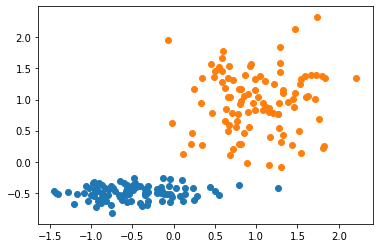

In [27]:
# generate dataset with two classes (labeled as 10 and 01, i.e. one-hot encoding)

cls1 = np.column_stack((np.random.normal(loc = [-0.5, -0.5], scale=[.5, .1], size=(100, 2)), np.ones(100), np.zeros(100)))
cls2 = np.column_stack((np.random.normal(loc = [1, 1], scale=[.5, .5], size=(100, 2)), np.zeros(100), np.ones(100)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :2]
# labels are used for illustration only
labels = data_set[:, 2:]

plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

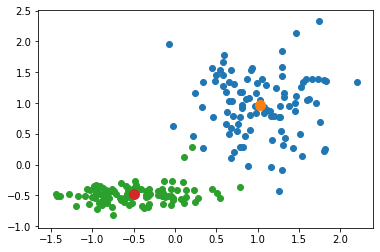

In [30]:
def dist(x, y):
    return np.sum(np.square(x - y), axis=1)

(params, labels) = k_means(dist, 2, features)

plt.scatter(features[labels == 0, 0], features[labels == 0, 1])
plt.scatter(params[0][0], params[0][1], marker='o', s=100)
plt.scatter(features[labels == 1, 0], features[labels == 1, 1])
plt.scatter(params[1][0], params[1][1], marker='o', s=100)